In [1]:
import random
import time
import matplotlib.pyplot as plt

In [2]:


def greedy_knapsack(n, m, W, P):
    items = [(P[i], W[i], P[i] / W[i]) for i in range(n)]  
    items.sort(key=lambda x: x[2], reverse=True)  
    
    total_profit = 0
    for i in range(n):
        if m > 0 and items[i][1] <= m:
            m -= items[i][1]
            total_profit += items[i][0]
        else:
            break
    
    if m > 0 and i < n:
        total_profit += items[i][0] * (m / items[i][1])
    
    return total_profit

def measure_time(n, m, trials=5):
    execution_times = []
    for _ in range(trials):
        start_time = time.time()
        
        W = [random.randint(1, 50) for _ in range(n)]  
        P = [random.randint(10, 100) for _ in range(n)] 
        ratios = [P[i] / W[i] for i in range(n)] 
        
        result = greedy_knapsack(n, m, W, P)
        end_time = time.time()
        
        execution_times.append((end_time - start_time) * 1000)
    
    avg_time = sum(execution_times) / trials
    print(f"Execution time for {n} items: {avg_time:.3f} ms")
    return avg_time


In [3]:
n = int(input("Enter the number of items: "))
m = int(input("Enter the knapsack capacity: "))

num_items = [10, 250, 500, 1000, 2000, 5000, 10000, 25000,30000,35000,40000,min(n, 45000)]
execution_times = [measure_time(size, m) for size in num_items]


Execution time for 10 items: 0.200 ms
Execution time for 250 items: 0.400 ms
Execution time for 500 items: 0.600 ms
Execution time for 1000 items: 1.708 ms
Execution time for 2000 items: 3.000 ms
Execution time for 5000 items: 8.003 ms
Execution time for 10000 items: 15.103 ms
Execution time for 25000 items: 39.313 ms
Execution time for 30000 items: 46.156 ms
Execution time for 35000 items: 55.446 ms
Execution time for 40000 items: 63.130 ms
Execution time for 45000 items: 73.295 ms


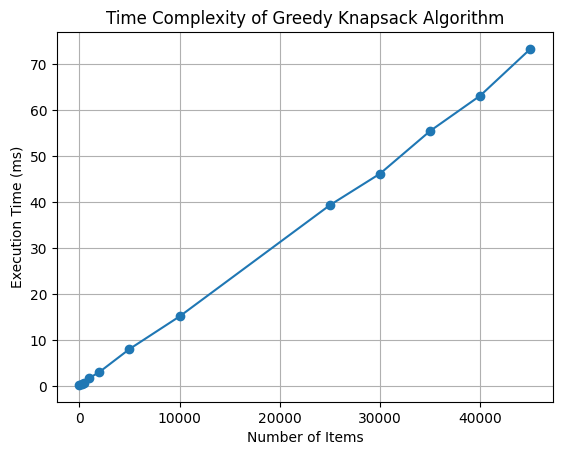

In [4]:
plt.plot(num_items, execution_times, marker='o', linestyle='-')
plt.xlabel("Number of Items")
plt.ylabel("Execution Time (ms)")
plt.title("Time Complexity of Greedy Knapsack Algorithm")
plt.grid()
plt.show()